# Random Forest
- Random - Type of Bagging - Bootstrapped Aggregation
- Forest  - Group of Decision Trees
- Bootstrapping - Bootstrapping in the context of machine learning refers to the technique of resampling the dataset with replacement to create multiple subsets, known as bootstrap samples. Each bootstrap sample is of the same size as the original dataset, and because it's created with replacement, some data points from the original dataset may appear multiple times in a single bootstrap sample, while others may not appear at all.
- For Bootstraping we can use - Row sampling, column sampling or combined sampling
- OUtput from each decision tree - If its classification then we take the mode of most frequent out or majority count from each tree. If its regression then we take the mean of all trees
- Few algorithms that have Low Bias & High Variance – Fully grown Decision Tree, SVM, & KNN – with less number of neighbors
- High Bias & Low Variance – Linear Regression & sometimes Logistic Regression
- Random Forest - Keep the Bias Low & bring Variance also Low.
- Random Forest - Keep the Bias Low & bring Variance also Low

In [1]:
# Sampling rows
def sample_rows(df, percent):
    return df.sample(int(percent*df.shape[0]), replace = True)

In [5]:
# Featrue sampling
def sample_features(df, percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df["target"] = df["target"]
    return new_df

In [6]:
def sample_combined(df, row_percent, col_percent):
    new_df = sample_rows(df, row_percent)
    return sample_features(new_df, col_percent)

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
np.random.seed(101)
X,y = make_circles(n_samples = 500, factor = 0.1, noise = 0.35, random_state = 101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
     

In [13]:
X_train[0:4,:]

array([[ 0.04691874, -0.6527689 ],
       [-0.21844181,  0.23820748],
       [-0.74295138, -0.54433616],
       [-0.21506996, -0.45285081]])

In [10]:
X.shape

(500, 2)

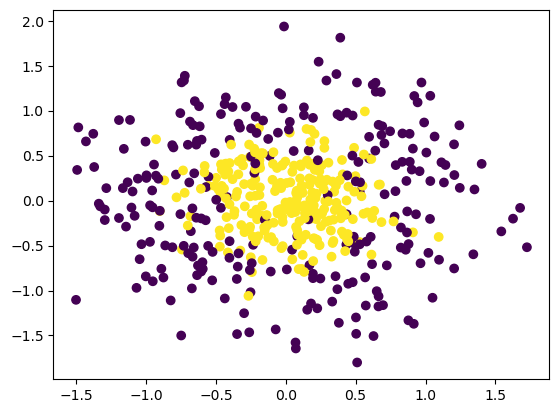

In [14]:
plt.scatter(X[:,0],X[:,1], c = y)

In [15]:
from sklearn.tree import DecisionTreeClassifier

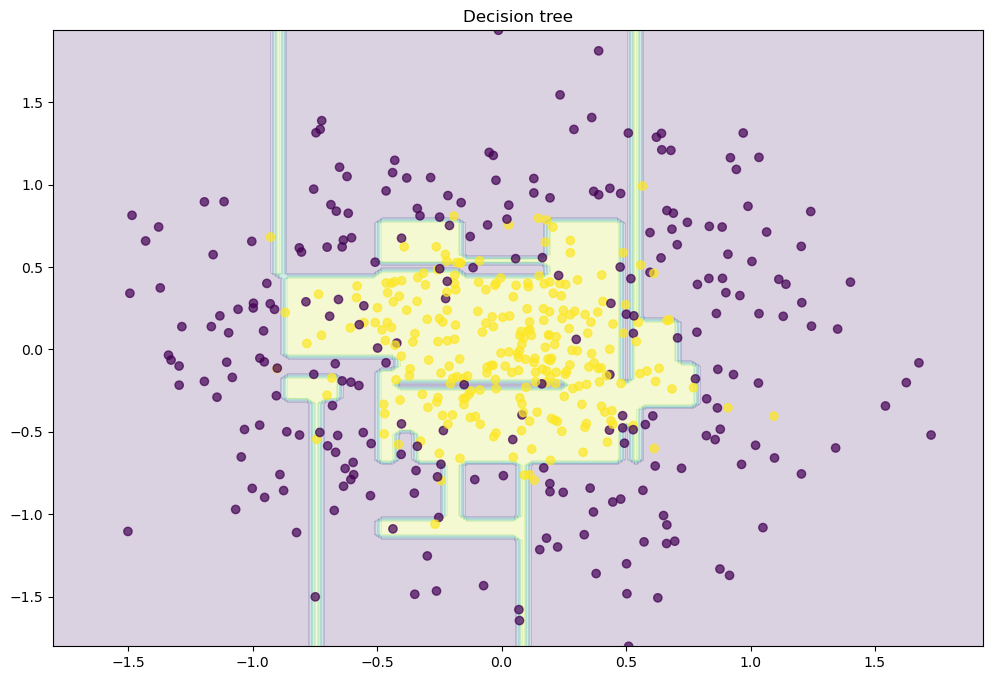

In [16]:
dtree = DecisionTreeClassifier(random_state=101)
dtree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Decision tree")
plt.show()

Here we can see decsion tree has tried to include all the points on training data 
This will result to high variance

In [17]:
from sklearn.ensemble import RandomForestClassifier

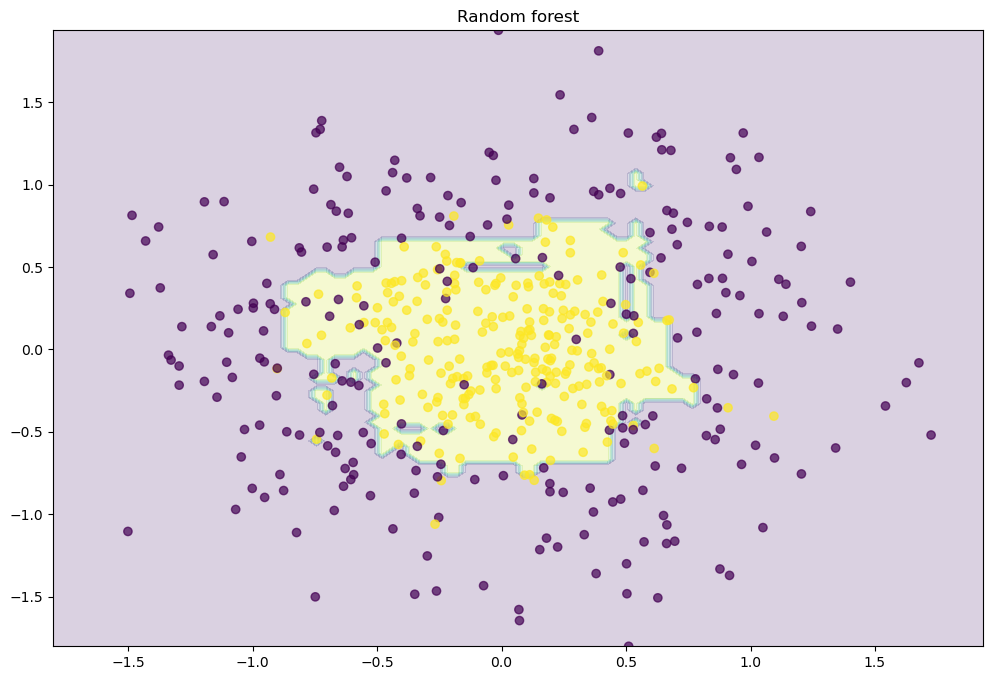

In [18]:
rf = RandomForestClassifier(n_estimators=500, random_state=101)
rf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()

As we can see here random forest has reduced the variance 

# Now looking at the regression tree model

In [20]:

n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)
     

The numpy.ravel() functions returns contiguous flattened array(1D array with all the input-array elements and with the same type as it)

(-5.0, 5.0)

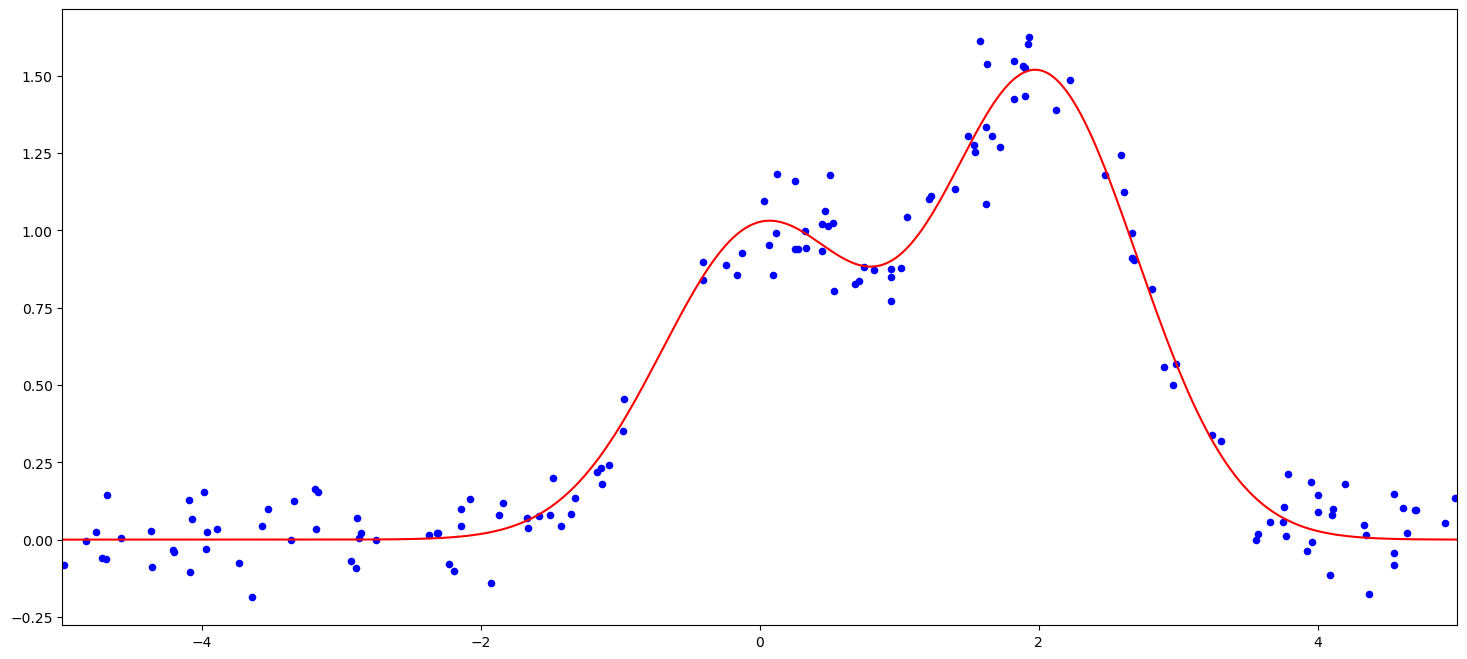

In [21]:

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.xlim([-5, 5])

Text(0.5, 1.0, 'Decision tree, MSE = 18.16')

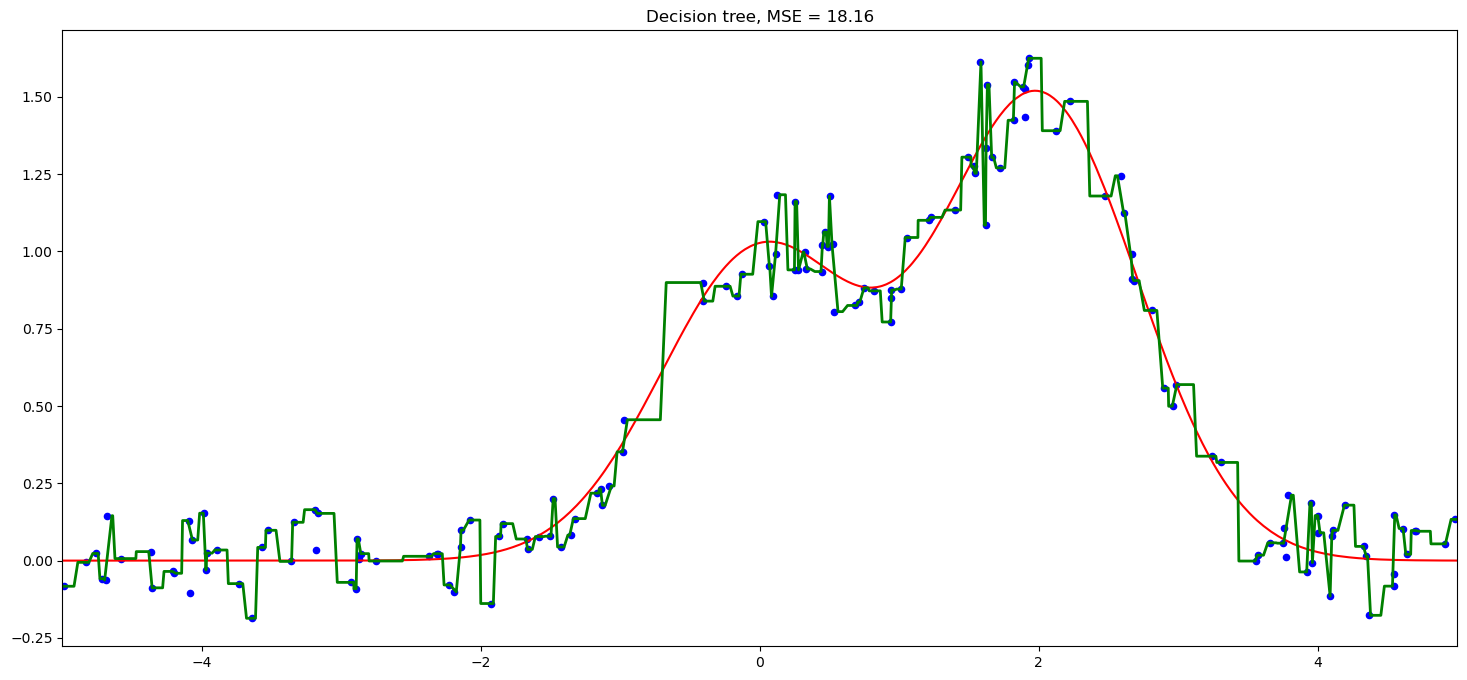

In [22]:

# One decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))

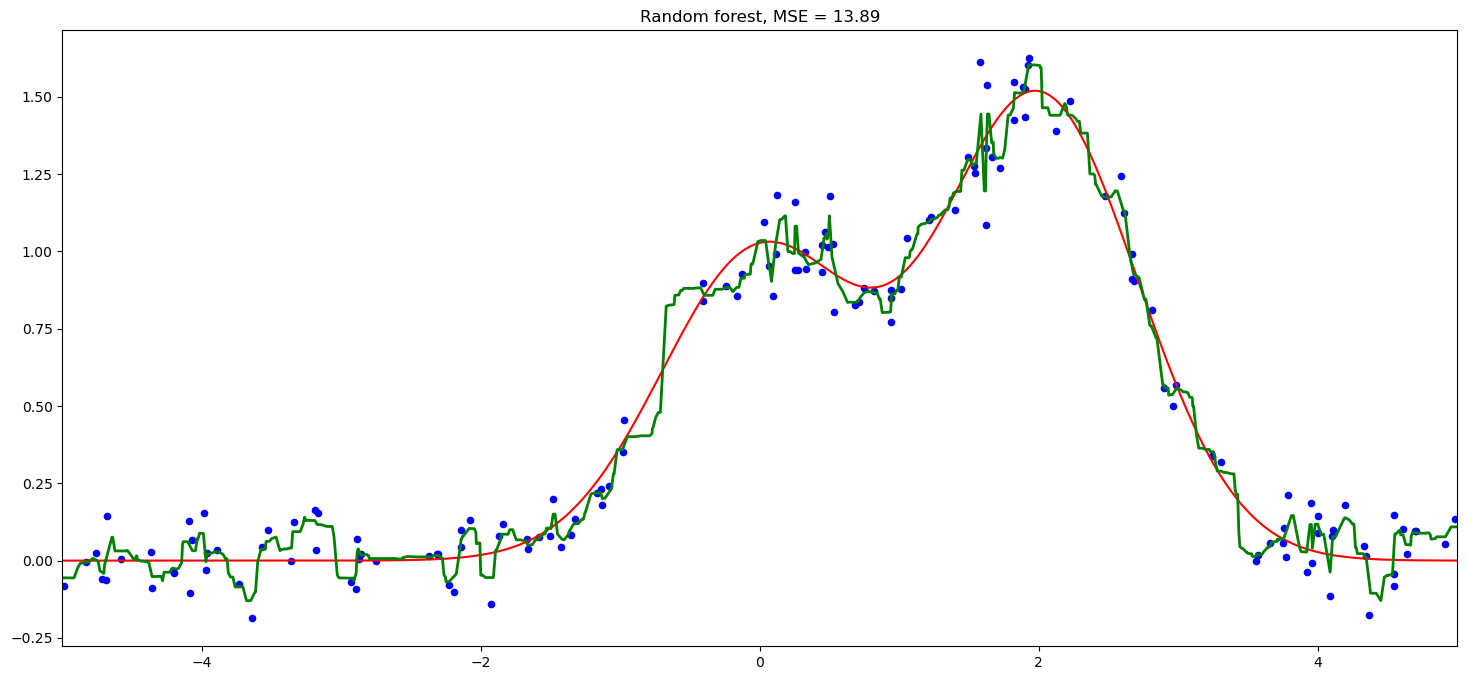

In [23]:


# Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));

## Random Forest Example

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. Target - Whether the person has a heart disease or not
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [26]:
data = pd.read_csv("./data/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [27]:
data.shape

(303, 14)

In [28]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [31]:
from sklearn.metrics import accuracy_score

In [30]:
rt = RandomForestClassifier()

In [33]:
rt.fit(X_train, y_train)
y_pred = rt.predict(X_test)
accuracy_score(y_test, y_pred)

0.8688524590163934

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [35]:
gb = GradientBoostingClassifier()
svc = SVC()
lr = LogisticRegression()

In [36]:
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
accuracy_score(y_test, y_pred)

0.8360655737704918

In [37]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.6065573770491803

In [39]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)
# better result may be becasue data was bit linear

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8688524590163934

In [42]:
rf = RandomForestClassifier(max_samples=0.75, random_state=101)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8360655737704918

In [43]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(),X,y,cv = 10, scoring="accuracy"))

0.8281720430107526

In [44]:
np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),X,y,cv = 10, scoring="accuracy"))

0.8282795698924732


# GridSearchCV
## Tuning HyperParamters in Random forest

In [47]:
# Number of trees in random fortest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8, None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 4*3*3*3 = 108, we will train 108 random forests & will check for accuracy & best parameters

In [48]:
param_grid = {
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth":max_depth,
    "max_samples":max_samples
}

In [49]:
rf = RandomForestClassifier()

In [52]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator=rf,
                       param_grid=param_grid,
                      cv = 5,
                       verbose = 2,
                       n_jobs = -1
                      )

In [53]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [54]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=2, max_features=0.2, max_samples=0.5)

In [57]:
rf_grid.best_params_
# n_estimators - number of decision trees

{'max_depth': 2, 'max_features': 0.2, 'max_samples': 0.5, 'n_estimators': 100}

In [58]:
rf_grid.best_score_

0.8392006802721088

# RandomSearchCV

In [60]:
# Number of trees in random fortest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8, None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True, False]

# Minimum number of samples required to split a node
min_samples_split = [2,5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2]


In [61]:
# if the dataset is big & have lots for hyper parameters then gridsearchcv will be slow
# In that case we use RandomSearchCV select few parameters randomly & perform tuning

In [64]:
param_grid = {
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth":max_depth,
    "max_samples":max_samples,
    "bootstrap":bootstrap,
    "min_samples_split":min_samples_split,
    "min_samples_leaf" : min_samples_leaf
}

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
rf_grid = RandomizedSearchCV(estimator=rf,
                            param_distributions=param_grid,
                            cv = 5,
                            verbose = 2,
                            n_jobs = -1)

In [67]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 397, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Users

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [68]:
rf_grid.best_estimator_

RandomForestClassifier(max_features=0.2, max_samples=0.5)

In [69]:
rf_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 0.5,
 'max_features': 0.2,
 'max_depth': None,
 'bootstrap': True}

In [70]:
rf_grid.best_score_

0.8223639455782313

# OOB - Out of Bag

In [71]:
rf = RandomForestClassifier(oob_score=True)

In [72]:
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [73]:
rf.oob_score_

0.8264462809917356

In [74]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.819672131147541

# Features Importance

In [75]:
# Using feature importance we can make model interpretable 

In [80]:
import seaborn as sns

In [76]:
data = pd.read_csv("./data/MNIST.csv")

In [77]:
data.shape

(42000, 785)

In [79]:
data.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

<Axes: >

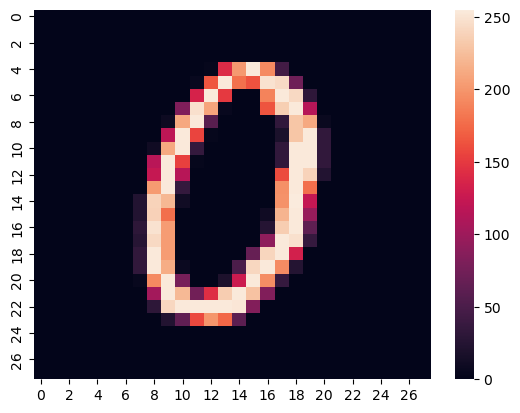

In [89]:
sns.heatmap(X.iloc[5].values.reshape(28,28))

In [90]:
#X.iloc[5].values.reshape(28,28)

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [92]:
rf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.04413824e-07, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.02438468e-06, 0.00000000e+00, 1.52319364e-06,
       1.02533602e-05, 2.80423924e-06, 7.75030115e-07, 4.00659484e-06,
       5.16512316e-07, 2.49315194e-06, 2.43448723e-06, 1.48601375e-06,
       2.73965467e-06, 3.34106458e-06, 1.45927503e-06, 5.13825784e-07,
       0.00000000e+00, 5.11434212e-07, 0.00000000e+00, 1.49891555e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [93]:
rf.feature_importances_.shape

(784,)

<Axes: >

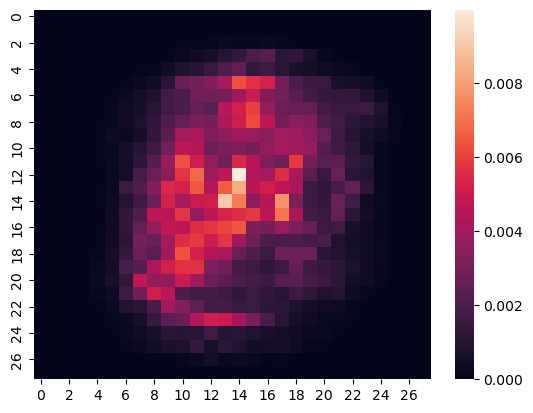

In [97]:
sns.heatmap(rf.feature_importances_.reshape(28,28))
# darker the shade less important the feature
# feature in the middle the most bright is most important feature
# Features are assigned the values based on the importance. 0 being the least important & 1 the most important

In [96]:
28*28

784

# Understanding how Feature Importance is done behind the scene

In [98]:
from sklearn.datasets import make_classification

In [99]:
X,y = make_classification(n_samples=5, n_classes = 2,
                         n_features = 2, n_informative=2,
                         n_redundant=0,
                         random_state = 0)

In [124]:
X

array([[ 0.96399434, -0.12399406],
       [ 1.05699092,  0.69448021],
       [-0.55744457,  0.08369352],
       [-1.19224399, -1.66447018],
       [-0.3874711 ,  1.38366234]])

In [125]:
y

array([0, 1, 0, 1, 0])

In [100]:
clf = DecisionTreeClassifier()

In [101]:
clf.fit(X,y)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'x[1] <= -0.894\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.5, 'x[0] <= 1.01\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

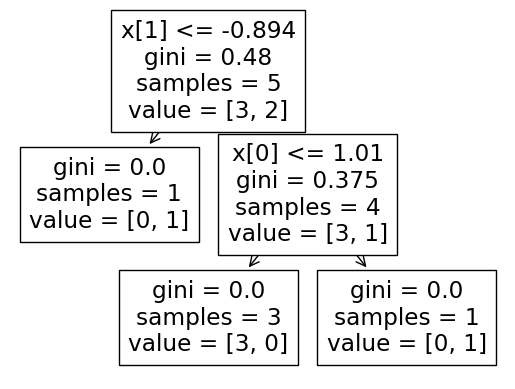

In [104]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [121]:
from matplotlib.pyplot import rcParams
rcParams["figure.figsize"] = 80,50
import dtreeviz
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
import graphviz.backend as be

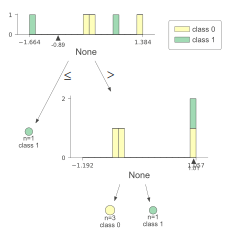

In [122]:

viz = dtreeviz(clf, 
               X,
               y)
               #feature_names=iris.feature_names, 
               #class_names=["setosa", "versicolor", "virginica"])
viz

# Featrue importance of Decision Tree

In [128]:
clf.feature_importances_

array([0.625, 0.375])

## Remeber - As feature importance is normalisd - That means if we add the importance of all the features it will add to 1

https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3

https://mljar.com/blog/feature-importance-in-random-forest/

https://medium.com/@soumendu1995/understanding-feature-importance-using-random-forest-classifier-algorithm-1fb96f2ff8a4

# Feature importance of Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 2)
rf.fit(X,y)
# n_estimators - number of decision tree

RandomForestClassifier(n_estimators=2)

In [133]:
rf.feature_importances_

array([0.3125, 0.6875])

In [134]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1656285163),
 DecisionTreeClassifier(max_features='sqrt', random_state=1051594272)]

In [135]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1656285163)

In [136]:
rf.estimators_[0].feature_importances_

array([0.625, 0.375])

In [137]:
rf.estimators_[1].feature_importances_

array([0., 1.])

In [138]:
# Feature importance of 1st col
print((0.625+0)/2)

0.3125


In [139]:
# Feature importance of 2nd col
print((0.375+1)/2)

0.6875


## Internally Decision trees calculates the feature importance. Random forest averages them out

Warning Impurity-based feature importances can be misleading for high cardinality features (many unique values). See Permutation feature importance as an alternative below.

https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance